In [1]:
import requests

In [2]:
vacancy_list = []


In [7]:
#r = requests.get('https://api.hh.ru/vacancies?text="big data" or "data science" or "data analyst" or "Big Data Specialist" or "machine learning" or  "data analytics" or "data engineer" or "data scientist" or "machine learning engineer" or "машинное обучение"&only_with_salary=false&per_page=100&pages=10&period=30&page=')
for i in range(1,11):
    req = 'https://api.hh.ru/vacancies?text="big data" or "data science" or "data analyst" or "Big Data Specialist" or "machine learning" or  "data analytics" or "data engineer" or "data scientist" or "machine learning engineer" or "машинное обучение"&only_with_salary=true&per_page=100&pages=10&period=30&currency=RUR&page=' + str(i)
    r = requests.get(req)
    parsed_string = r.json()
    for item in parsed_string["items"]:
        #print(item)
        vacancy = {"salary":None, "area":None, "name":None, "employer":None}
        vacancy["salary"] = parse_salary( item["salary"] )
        vacancy["area"] = item["area"]["name"]
        vacancy["name"]=item["name"]
        vacancy["employer"]=item["employer"]["name"]
        vacancy_list.append(vacancy)
    #print(i)
    print(len(vacancy_list))

100
200
300
348
348
348
348
348
348
348


In [8]:
parsed_string = r.json()

In [9]:
r.text

'{"clusters":null,"items":[],"pages":5,"arguments":null,"found":448,"alternate_url":"https://hh.ru/search/vacancy?items_on_page=100&only_with_salary=true&text=%22big+data%22+or+%22data+science%22+or+%22data+analyst%22+or+%22Big+Data+Specialist%22+or+%22machine+learning%22+or++%22data+analytics%22+or+%22data+engineer%22+or+%22data+scientist%22+or+%22machine+learning+engineer%22+or+%22%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5+%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%22&search_period=30&enable_snippets=true&page=10","per_page":100,"page":10}'

In [148]:
   print (vacancy_list)

[{'salary': 62500.0, 'area': 'Таганрог', 'name': 'Программист / Developer', 'employer': 'CVisionLab'}, {'salary': -1, 'area': 'Москва', 'name': 'Senior Data Scientist / Team Lead (Machine Learning and Data Mining)', 'employer': 'МегаФон'}, {'salary': 150000, 'area': 'Москва', 'name': 'Ведущий разработчик Ruby', 'employer': '«Баланс-Платформа»'}, {'salary': -1, 'area': 'Москва', 'name': 'Lead data scientist/Ведущий специалист по анализу данных', 'employer': 'Кловер Групп'}, {'salary': -1, 'area': 'Казань', 'name': 'Lead data scientist/ Ведущий специалист по анализу данных', 'employer': 'Кловер Групп'}, {'salary': -1, 'area': 'Минск', 'name': 'Data Engineer', 'employer': 'Бануба Девелопмент'}, {'salary': 100000, 'area': 'Санкт-Петербург', 'name': 'Аналитик-математик (Data scientist)', 'employer': 'Нева онлайн'}, {'salary': 175000.0, 'area': 'Москва', 'name': 'Data scientist', 'employer': 'HeadHunter'}, {'salary': 165000.0, 'area': 'Москва', 'name': 'Data engineer', 'employer': 'FUSION CO

In [6]:
def parse_salary(sal):
    if sal == None:
        return 0
    if sal["to"] == None :
        return sal["from"]
    if sal["from"] == None:
        return sal["to"]
    return (sal["from"] + sal["to"])/2

In [10]:

i = 0
for item in parsed_string["items"]:
    i=i+1
    #print(item)
    vacancy = {"salary":None, "area":None, "name":None, "employer":None}
    vacancy["salary"] = parse_salary( item["salary"] )
    vacancy["area"] = item["area"]["name"]
    vacancy["name"]=item["name"]
    vacancy["employer"]=item["employer"]["name"]
    vacancy_list.append(vacancy)
#print(i)
print(len(vacancy_list))


348


In [12]:
vacancy = {0:0, 80:0, 120:0, 150:0, 200:0, 300:0, 310:0}
#-1, <80, 80-120, 120-150, 150-200, 200-300, 300+
for vac in vacancy_list:
    if vac["salary"] == 0:
        vacancy[0] = vacancy[0] + 1
        continue
    if vac["salary"] < 80000:
        vacancy[80] = vacancy[80] + 1
        continue
    if vac["salary"] < 120000 :
        vacancy[120] = vacancy[120] + 1
        continue
    if vac["salary"] < 150000 :
        vacancy[150] = vacancy[150] + 1
        continue  
    if vac["salary"] < 200000 :
        vacancy[200] = vacancy[200] + 1
        continue
    if vac["salary"] < 300000 :
        vacancy[300] = vacancy[300] + 1
        continue
    vacancy[310] = vacancy[310] + 1
        
    

In [13]:
print (vacancy)

{0: 0, 80: 162, 120: 62, 150: 44, 200: 45, 300: 30, 310: 5}


In [14]:
dict_vacancy = {}
for vac in vacancy_list:
    dict_vacancy[vac["name"]]=dict_vacancy.get(vac["name"],0)+1
tmp = dict((k,v) for k,v in dict_vacancy.items() if v>4 )
print (tmp)

{'Senior Java Developer': 10, 'DevOps Engineer': 5, 'Старший специалист по продажам корпоративным клиентам': 6, 'Frontend Developer': 5, 'Blockchain Chief Architect - $8250/month - REMOTE WORK': 5, 'Software Architect (RoR, Java, .NET, Front End, PHP, ) - $5000/month - REMOTE WORK': 5, 'Software Engineer (Java, C++, .NET, Python, Front End) - $2500/month - REMOTE WORK': 7, 'Quant Analyst / Трейдер-разработчик': 6, 'Ведущий менеджер по продажам': 6}


In [15]:
import matplotlib.pyplot as plt
import numpy as np

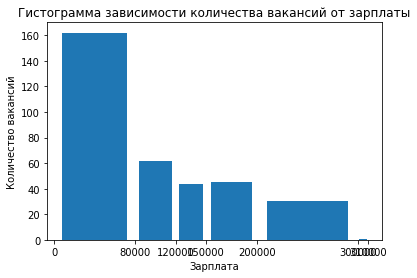

In [16]:
bins = [x*1000 for x in vacancy.keys()]
#print (bins)
vals = [x["salary"] for x in vacancy_list]
#vals=[]
#print (vals)
plt.hist(vals, bins, histtype='bar', rwidth = 0.8)
plt.title("Гистограмма зависимости количества вакансий от зарплаты")
plt.xlabel("Зарплата")
plt.ylabel("Количество вакансий")
plt.xticks(bins)

plt.show()

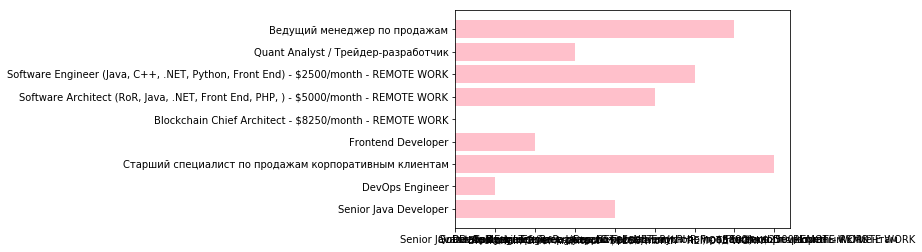

In [21]:
vals = [x for x in tmp.keys()]
bins = [x for x in tmp.values()]
y_pos = np.arange(len(bins))
plt.barh(y_pos,vals, color='pink')
plt.yticks(y_pos, vals)
plt.xticks(vals)

plt.show()

In [258]:

bins.sort()
print(bins)

[5, 5, 5, 5, 6, 6, 6, 7, 10]
